# <center> SYMPTOMATIC PREDICTIVE DATA MINING STUDY OF NOVEL CORONAVIRUS (COVID 19)
#### <center> By <center> Abhishek Mukherjee(19BCE0598) <center> Arijit Chakraborty(19BIT0255)

# Importing libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

# Reading dataset

In [3]:
a=list(range(209429,211429))
df=pd.read_csv("covid_symptoms.csv")
new_df=df.drop(['gender'],axis=1)
new_df=df.drop(['test_indication'],axis=1)
new_df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female
...,...,...,...,...,...,...,...,...
211424,0.0,1.0,0.0,0.0,0.0,1.0,Yes,Male
211425,0.0,0.0,0.0,0.0,0.0,1.0,No,Male
211426,0.0,0.0,0.0,0.0,0.0,1.0,No,NaN
211427,0.0,0.0,0.0,0.0,0.0,1.0,No,Female


In [4]:
df.head(20)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
5,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Contact with confirmed
6,0.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
7,1.0,1.0,1.0,0.0,1.0,0.0,No,Female,Abroad
8,1.0,0.0,1.0,0.0,0.0,0.0,No,Female,Abroad
9,1.0,1.0,1.0,1.0,0.0,0.0,No,Female,Abroad


# Data Preprocessing

### Removing null values


In [5]:
df.isnull().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

#### There are no null values

In [8]:
np.shape(df)

(206058, 9)

### Replacing categorical variables with numbers

In [9]:
df=df.replace(to_replace="No", value=0.0)
df=df.replace(to_replace="Yes", value=1.0)

In [10]:
new_df=new_df.replace(to_replace="No", value=0.0)
new_df=new_df.replace(to_replace="Yes", value=1.0)

In [11]:
df=df.replace(to_replace="Male", value=0.0)
df=df.replace(to_replace="Female",value=1.0)

In [12]:
df=df.replace(to_replace="Other", value=1.0)
df=df.replace(to_replace="Abroad", value=2.0)
df=df.replace(to_replace="Contact with confirmed",value=3.0)

In [13]:
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
9,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0


# Distribution of positive and negative results

C:\Users\Abhishek Mukherjee\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


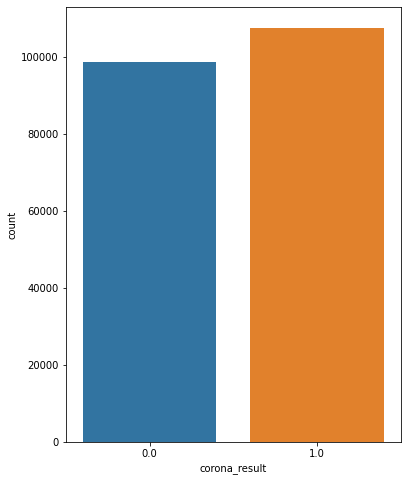

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=6,8

sn.countplot(df["corona_result"])
plt.show()

# Checking for relationship among variables


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above
cough,1.000000,0.406156,0.202819,0.194088,0.219800,0.374248,0.002367
fever,0.406156,1.000000,0.161259,0.180149,0.247317,0.435172,0.073316
sore_throat,0.202819,0.161259,1.000000,0.152021,0.285291,0.264524,-0.030593
shortness_of_breath,0.194088,0.180149,0.152021,1.000000,0.164464,0.222370,0.033321
head_ache,0.219800,0.247317,0.285291,0.164464,1.000000,0.329885,-0.045329
corona_result,0.374248,0.435172,0.264524,0.222370,0.329885,1.000000,0.051302
age_60_and_above,0.002367,0.073316,-0.030593,0.033321,-0.045329,0.051302,1.000000


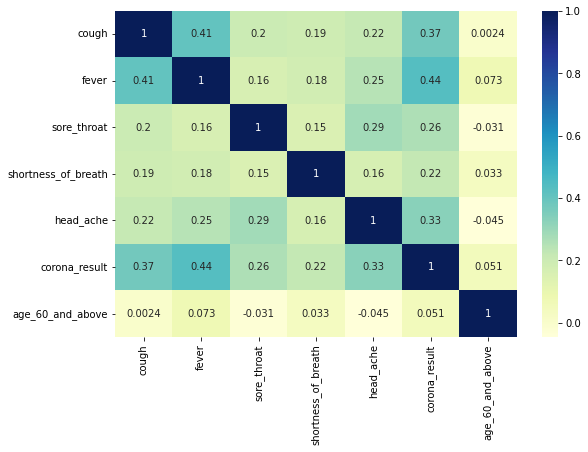

In [15]:
plt.figure(figsize=(9,6))
c=new_df.corr()
sn.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,cmap='YlGnBu',annot=True)
c

# Train-Test split 

In [16]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [17]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 
      'age_60_and_above', 'gender', 'test_indication']]

In [18]:
y=df['corona_result']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print("Coefficient = ",model.coef_)
print("Intercept = ",model.intercept_)

Coefficient =  [ 0.104313    0.26581307  0.18139491  0.17823894  0.2094097   0.07682559
 -0.05357372  0.2405176 ]
Intercept =  0.007154685737687849


In [22]:
y_pred = model.predict(X_test)
y_pred

array([1.0177724 , 1.19601134, 0.24767228, ..., 0.19409856, 0.24767228,
       1.48963815])

In [23]:
from sklearn.metrics import accuracy_score
r2_score=model.score(X_test,y_test)

In [24]:
print(r2_score*100,'%')

44.86924471153603 %


In [25]:
from sklearn import metrics
print('Accuracy: ',r2_score*100,'%')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy:  44.86924471153603 %
Mean Absolute Error: 0.31321624030021233
Mean Squared Error: 0.13758255324121565
Root Mean Squared Error: 0.3709212224195532


In [26]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X_test, y_test, cv = 5,scoring='r2')
print(accuracy)

[0.45045361 0.44181153 0.45824621 0.4431686  0.44930625]


Text(0.5, 1.0, 'Evaluation Metrics for Linear Regression')

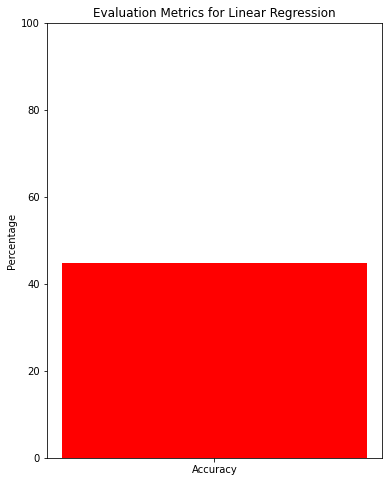

In [27]:

plt.plot(figsize=(40,20))
plt.bar(['Accuracy'],[r2_score*100],color=['red'])
plt.plot([r2_score],color='black')
plt.ylabel("Percentage")
plt.ylim([0,100])
plt.title('Evaluation Metrics for Linear Regression')

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
pred = np.array(model.predict(X_test))

recall_lr = rs(y_test,pred)
precision_lr = ps(y_test,pred)
f1_lr = fs(y_test,pred)
ma_lr = model.score(X_test,y_test)

In [31]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_lr)
print('Precision Score: ',precision_lr)
print('F1 Score: ',f1_lr)
print('Accuracy: ',ma_lr)
a = pd.DataFrame(y_test)
a['pred']= model.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.8171149690783102
Precision Score:  0.883575716069774
F1 Score:  0.8490467434433369
Accuracy:  0.8486072017858876

	Table 3

        corona_result  pred
153465            1.0   1.0
41216             1.0   1.0
86419             0.0   0.0
191775            1.0   0.0
184709            1.0   1.0


Text(0.5, 1.0, 'Evaluation Metrics for Logistic Regression')

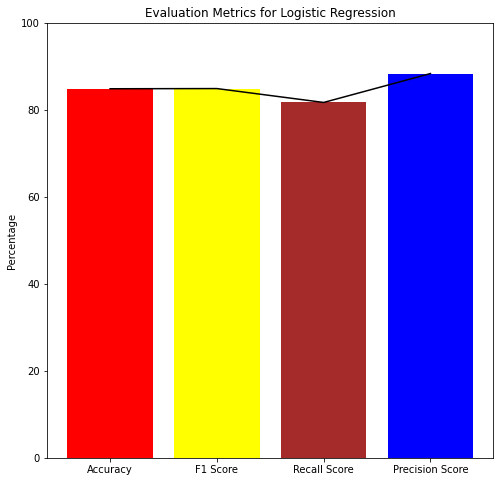

In [59]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=8,8
plt.ylim([0,100])
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_lr*100,f1_lr*100,recall_lr*100,precision_lr*100],color=['red','yellow','brown','blue'])
plt.plot([ma_lr*100,f1_lr*100,recall_lr*100,precision_lr*100],color='black')
plt.ylabel("Percentage")
plt.title('Evaluation Metrics for Logistic Regression')

# Gausian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
classifier.fit(X_train,y_train)

GaussianNB()

In [35]:
pred = np.array(classifier.predict(X_test))

recall_gnb = rs(y_test,pred)
precision_gnb = ps(y_test,pred)
f1_gnb = fs(y_test,pred)
ma_gnb = classifier.score(X_test,y_test)

In [36]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_gnb)
print('Precision Score: ',precision_gnb)
print('F1 Score: ',f1_gnb)
print('Accuracy: ',ma_gnb)
a = pd.DataFrame(y_test)
a['pred']= classifier.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  0.7255492722721795
Precision Score:  0.9280801612711965
F1 Score:  0.8144120707596254
Accuracy:  0.8268950791031738

	Table 3

        corona_result  pred
189806            1.0   1.0
165442            1.0   0.0
43346             0.0   0.0
86601             0.0   0.0
197297            1.0   1.0


Text(0.5, 1.0, 'Evaluation Metrics for Gaussian Naive Bayes')

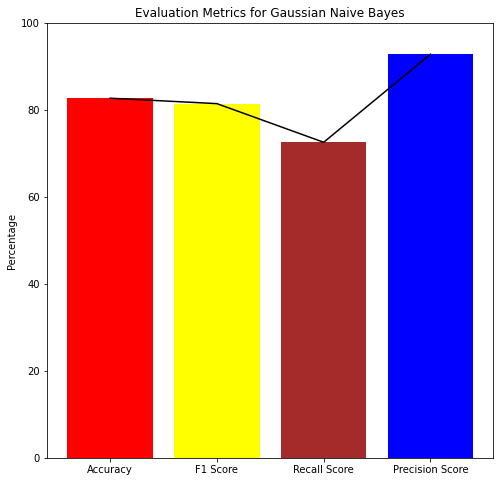

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=8,8
plt.ylim([0,100])
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_gnb*100,f1_gnb*100,recall_gnb*100,precision_gnb*100],color=['red','yellow','brown','blue'])
plt.plot([ma_gnb*100,f1_gnb*100,recall_gnb*100,precision_gnb*100],color='black')
plt.ylabel("Percentage")
plt.title('Evaluation Metrics for Gaussian Naive Bayes')


# KNN

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
KNNX = scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(KNNX,y)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
Clusters = []
Accuracy = []

for i in range(1,20):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    #Train the model using the training dataset
    knn.fit(X_train, y_train)
    #Predict the output for test dataset
    y_pred = knn.predict(X_test)
    Clusters.append(i)
    #df['pred']=y_pred
    Accuracy.append(metrics.accuracy_score(y_test, y_pred))

In [40]:
print(Clusters)
print(Accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.9997670581384063, 0.9998252936038047, 0.9997476463166068, 0.9997864699602058, 0.9997088226730079, 0.9997282344948073, 0.9996311753858099, 0.9996505872076095, 0.9995535280986121, 0.9995729399204115, 0.9994952926332136, 0.9995147044550131, 0.9994952926332136, 0.9995535280986121, 0.9995341162768125, 0.9995341162768125, 0.9995147044550131, 0.9995147044550131, 0.9994758808114141]


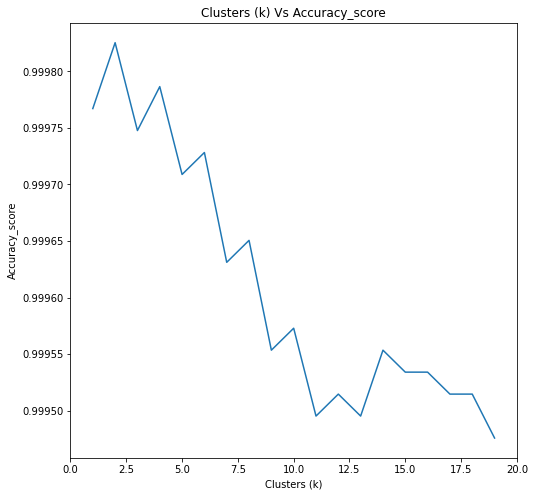

In [41]:
import matplotlib.pyplot as plt
plt.title("Clusters (k) Vs Accuracy_score")
plt.xlabel("Clusters (k)")
plt.xlim(0,20,1)
plt.ylabel("Accuracy_score")
plt.plot(Clusters, Accuracy)
plt.show()

In [42]:
pred = np.array(knn.predict(X_test))

recall_knn = rs(y_test,pred)
precision_knn = ps(y_test,pred)
f1_knn = fs(y_test,pred)
ma_knn = knn.score(X_test,y_test)

In [43]:
print('*** Evaluation metrics for test dataset ***\n')
print('Recall Score: ',recall_knn)
print('Precision Score: ',precision_knn)
print('F1 Score: ',f1_knn)
print('Accuracy: ',ma_knn)
a = pd.DataFrame(y_test)
a['pred']= knn.predict(X_test)
print('\n\tTable 3\n')
print(a.head())

*** Evaluation metrics for test dataset ***

Recall Score:  1.0
Precision Score:  0.9989925749039215
F1 Score:  0.9994960335977602
Accuracy:  0.9994758808114141

	Table 3

        corona_result  pred
122982            1.0   1.0
54860             0.0   0.0
123875            1.0   1.0
165644            1.0   1.0
27483             0.0   0.0


Text(0.5, 1.0, 'Evaluation Metrics for KNN')

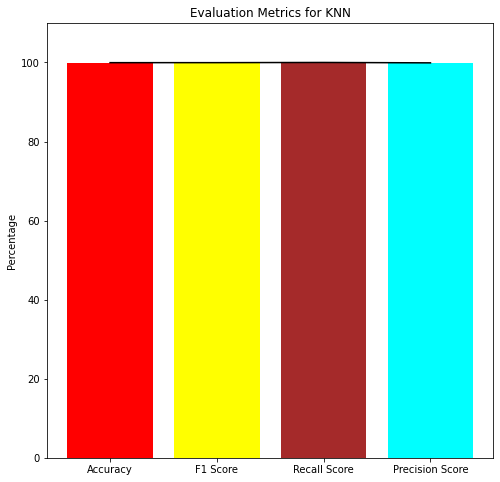

In [44]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=8,8
plt.ylim([0,110])
plt.bar(['Accuracy','F1 Score','Recall Score','Precision Score'],[ma_knn*100,f1_knn*100,recall_knn*100,precision_knn*100],color=['red','yellow','brown','cyan'])
plt.plot([ma_knn*100,f1_knn*100,recall_knn*100,precision_knn*100],color='black')
plt.ylabel("Percentage")
plt.title('Evaluation Metrics for KNN')


# Comparison of Evaluation Metrics

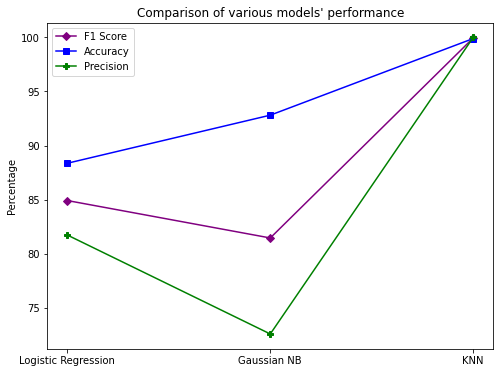

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
#plt.bar(['Logistic Regression','Decision Tree','SVM','Gaussian NB','Boosted Random Forest'],[f1_lr,f1_dtc,f1_svm,f1_gnb,f1],color=['red','green','purple','orange','Blue'])
plt.plot(['Logistic Regression','Gaussian NB','KNN'],[f1_lr*100,f1_gnb*100,f1_knn*100],color='purple',marker='D')
plt.plot(['Logistic Regression','Gaussian NB','KNN'],[precision_lr*100,precision_gnb*100,precision_knn*100],color='blue',marker='s')
plt.plot(['Logistic Regression','Gaussian NB','KNN'],[recall_lr*100,recall_gnb*100,recall_knn*100],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')
plt.ylabel("Percentage")
plt.show(fig)

(0.0, 100.0)

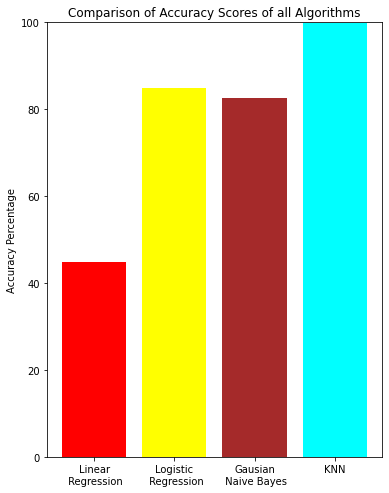

In [56]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=10,10

plt.bar(['Linear\n Regression','Logistic\n Regression','Gausian\n Naive Bayes','KNN'],[r2_score*100,ma_lr*100,ma_gnb*100,ma_knn*100],color=['red','yellow','brown','cyan'])
# plt.plot([ma_lr*100,ma_dtc*100,ma_gnb*100,ma_knn*100],color='black')
plt.title('Comparison of Accuracy Scores of all Algorithms')
plt.ylabel("Accuracy Percentage")
plt.ylim([0,100])

# Accuracy Results

<b>
    <li>Linear Regression - 44.64%
    <li>Logistic Regression - 84.77%
    <li>Gaussian NB - 82.68%
    <li>KNN (K Nearest Neighbors) - 99.95%
    

### From above implementation it is quite evident that KNN gives best results.